#### Simulation: Different spatial patterns to understand behavior of TDA adjacency method

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [2]:
NUM_OF_ITERATIONS = 100
GRID_SIZE = 10

# Set the random seed
np.random.seed(0)
RANDOM_SEED_LIST = np.random.randint(0, 1000, NUM_OF_ITERATIONS)

# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML'])


for iter in range(NUM_OF_ITERATIONS):
    print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    gdf_none = generate_grid_dataframe(GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)        # No spatial correlation
    gdf_positive = generate_grid_dataframe(GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED) 

    # Calculate Moran’s I
    moran_none = calculate_moran_i(gdf_none, GRID_SIZE)
    moran_positive = calculate_moran_i(gdf_positive, GRID_SIZE)

    for gdf in [gdf_none, gdf_positive]:
        for filter_method in ['up', 'down']:
        
            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold = [0,0.7], filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Value')

            if filter_method == 'up' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)


Iteration: 0
Persistence intervals for dimension 0: [[0.         0.32276745]
 [0.         0.35223027]
 [0.         0.35223027]
 [0.         0.35687086]
 [0.         0.35687086]
 [0.         0.37404799]
 [0.         0.37404799]
 [0.         0.37404799]
 [0.         0.37411997]
 [0.         0.37822438]
 [0.         0.37822438]
 [0.         0.3849048 ]
 [0.         0.3849048 ]
 [0.         0.38954243]
 [0.         0.39053791]
 [0.         0.39263802]
 [0.         0.39263802]
 [0.         0.39639622]
 [0.         0.40114033]
 [0.         0.41662569]
 [0.         0.42289716]
 [0.         0.424232  ]
 [0.         0.424232  ]
 [0.         0.42464915]
 [0.         0.42464915]
 [0.         0.42535262]
 [0.         0.43314968]
 [0.         0.43341906]
 [0.         0.43604094]
 [0.         0.43723173]
 [0.         0.4377404 ]
 [0.         0.4377404 ]
 [0.         0.43885645]
 [0.         0.44143095]
 [0.         0.44218707]
 [0.         0.4429061 ]
 [0.         0.44425761]
 [0.         0.45777651

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_35370/1750618544.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Persistence intervals for dimension 0: [[0.         0.43020027]
 [0.         0.43020027]
 [0.         0.43020027]
 [0.         0.43020027]
 [0.         0.43020027]
 [0.         0.43091147]
 [0.         0.43091147]
 [0.         0.44426012]
 [0.         0.44426012]
 [0.         0.44426012]
 [0.         0.44429598]
 [0.         0.45700971]
 [0.         0.45700971]
 [0.         0.46078919]
 [0.         0.46078919]
 [0.         0.46078919]
 [0.         0.46078919]
 [0.         0.46078919]
 [0.         0.46226181]
 [0.         0.46226181]
 [0.         0.46226181]
 [0.         0.46226181]
 [0.         0.46226181]
 [0.         0.46402173]
 [0.         0.46402173]
 [0.         0.46528951]
 [0.         0.46593915]
 [0.         0.46593915]
 [0.         0.46632761]
 [0.         0.46632761]
 [0.         0.46632761]
 [0.         0.46660709]
 [0.         0.46660709]
 [0.         0.46742633]
 [0.         0.46742633]
 [0.         0.46742633]
 [0.         0.46768633]
 [0.         0.46808729]
 [0.       

In [3]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML
0,0,684,none,0.036149,up,96,48.066538,0.500693,24.033269,0.250347
1,0,684,none,0.036149,down,96,33.895620,0.353079,16.947810,0.176540
2,0,684,positive,0.830601,up,100,49.903398,0.499034,24.951699,0.249517
3,0,684,positive,0.830601,down,100,47.844038,0.478440,23.922019,0.239220
4,1,559,none,-0.057844,up,98,51.653432,0.527076,25.826716,0.263538


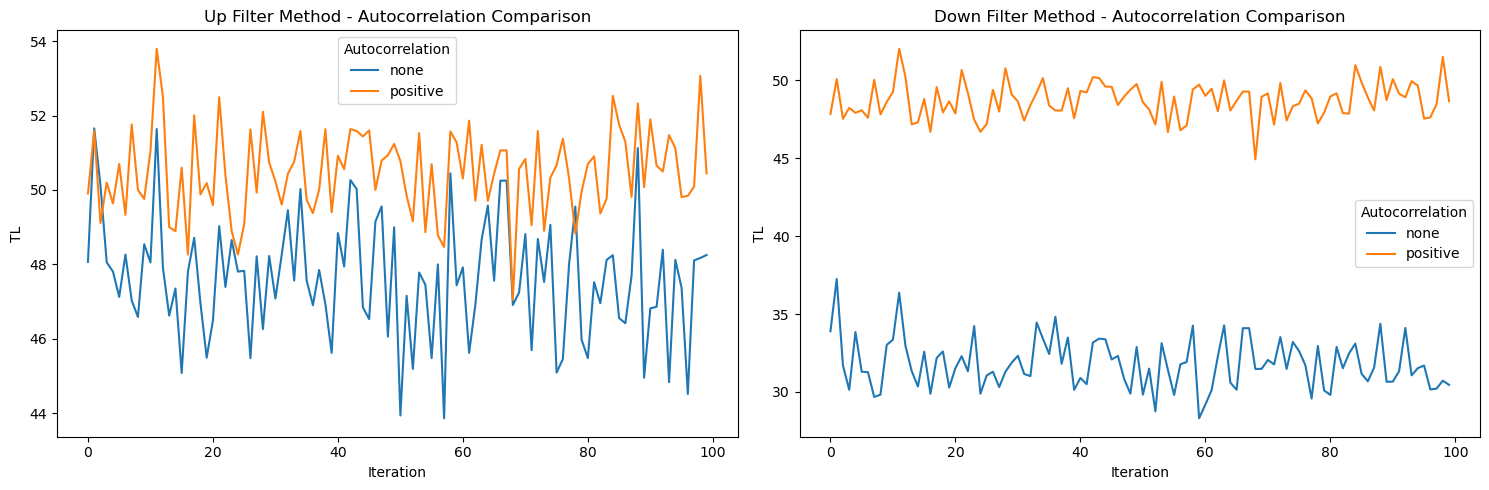

In [4]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


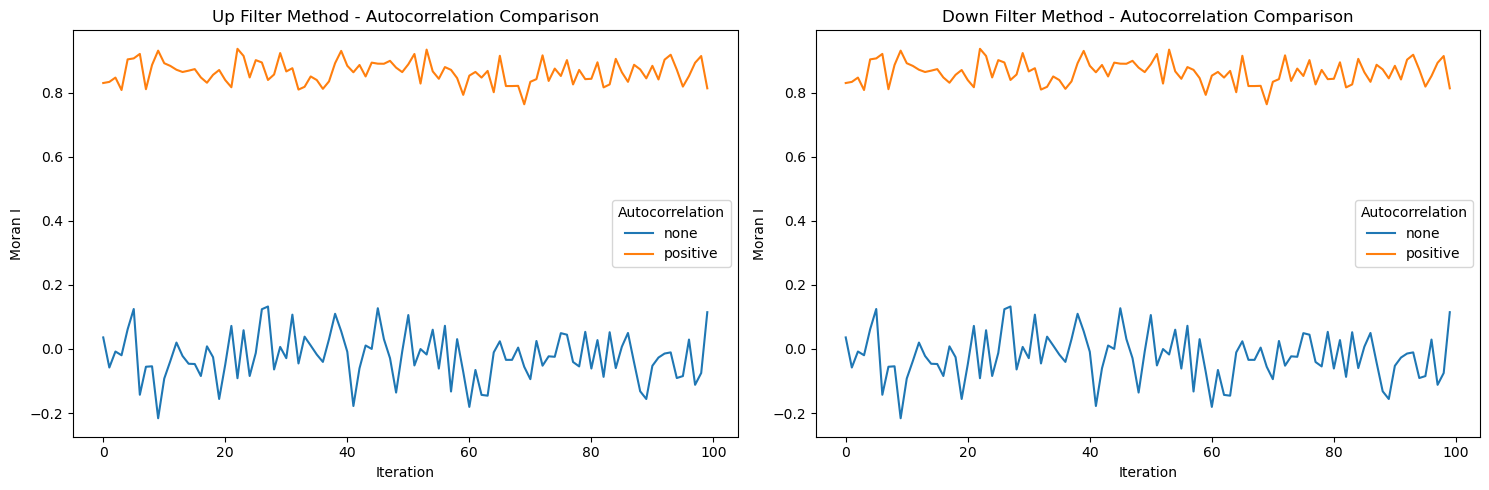

In [5]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['Moran I'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Moran I")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

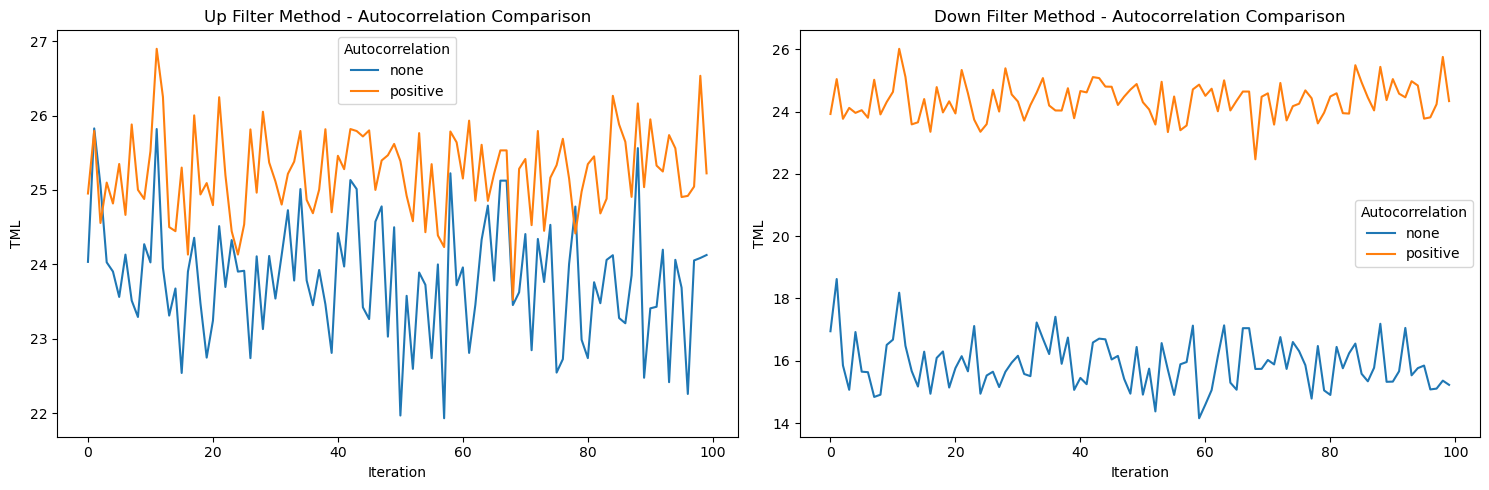

In [6]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TML'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TML")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


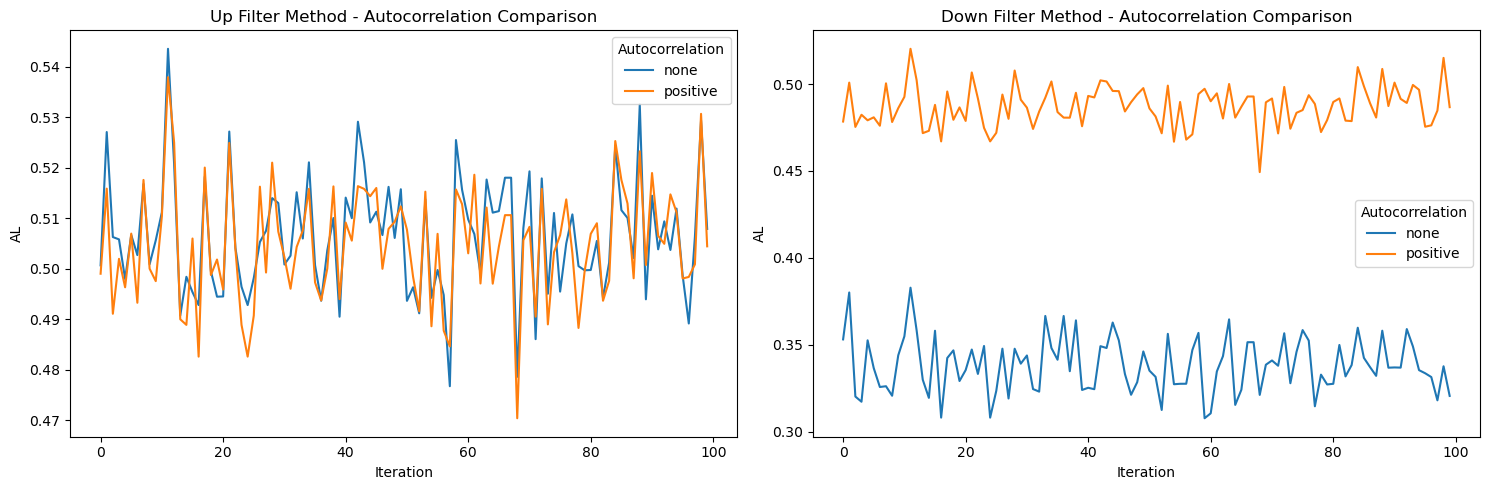

In [7]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


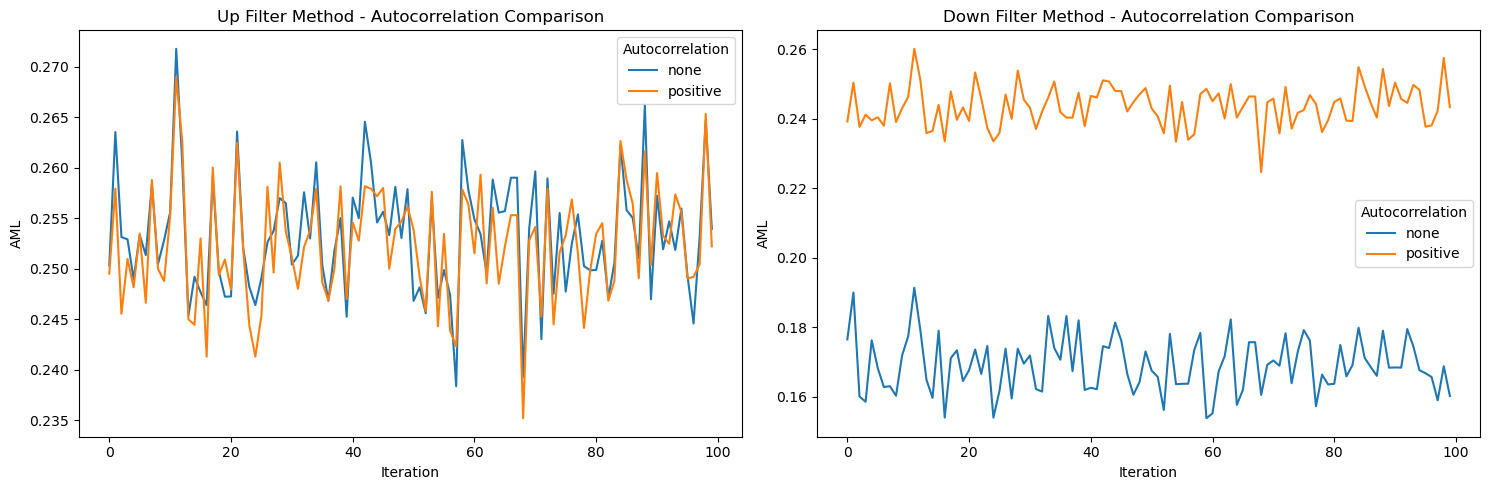

In [8]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AML'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AML")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


In [9]:
results_df.head()

,Iteration,Random Seed,Autocorrlation,Moran I,Filter Method,Number of H0 Points,TL,AL,TML,AML
0,0,684,none,0.036149,up,96,48.066538,0.500693,24.033269,0.250347
1,0,684,none,0.036149,down,96,33.895620,0.353079,16.947810,0.176540
2,0,684,positive,0.830601,up,100,49.903398,0.499034,24.951699,0.249517
3,0,684,positive,0.830601,down,100,47.844038,0.478440,23.922019,0.239220
4,1,559,none,-0.057844,up,98,51.653432,0.527076,25.826716,0.263538


In [10]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AL'].describe()

count      mean       std       min       25%  \
Filter Method Autocorrlation                                                  
down          none            100.0  0.338359  0.015882  0.307711  0.326899   
              positive        100.0  0.487296  0.011763  0.449348  0.479110   
up            none            100.0  0.506446  0.011502  0.476769  0.498607   
              positive        100.0  0.504785  0.011518  0.470429  0.497505   

                                   50%       75%       max  
Filter Method Autocorrlation                                
down          none            0.336895  0.349213  0.382833  
              positive        0.487694  0.494747  0.520293  
up            none            0.506059  0.513824  0.543548  
              positive        0.504703  0.513129  0.537931

In [11]:
# summarize AL
results_df.groupby(['Filter Method','Autocorrlation'])['AML'].describe()

count      mean       std       min       25%  \
Filter Method Autocorrlation                                                  
down          none            100.0  0.169180  0.007941  0.153855  0.163450   
              positive        100.0  0.243648  0.005882  0.224674  0.239555   
up            none            100.0  0.253223  0.005751  0.238385  0.249303   
              positive        100.0  0.252392  0.005759  0.235215  0.248752   

                                   50%       75%       max  
Filter Method Autocorrlation                                
down          none            0.168447  0.174607  0.191416  
              positive        0.243847  0.247373  0.260146  
up            none            0.253030  0.256912  0.271774  
              positive        0.252351  0.256565  0.268965

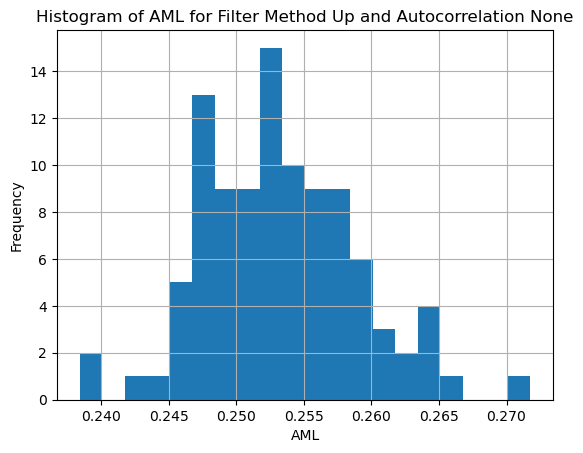

In [12]:
# for filter method up and AML autocorrelation none plot a histogram
results_df[(results_df['Filter Method'] == 'up') & (results_df['Autocorrlation'] == 'none')]['AML'].hist(bins=20)
plt.xlabel('AML')
plt.ylabel('Frequency')
plt.title('Histogram of AML for Filter Method Up and Autocorrelation None')
plt.show()